# Unsupervised Learning
## Project: Creating Customer Segments
### Goal: to describe variations of different customers 

---
## Getting Started

In [50]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs # Import supplementary visualization code visuals.py
%matplotlib inline 


# Load the wholesale customers dataset:
try:
    data = pd.read_csv('customers.csv')
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"


Wholesale customers dataset has 440 samples with 6 features each.


----
## Data Exploration

   - Visualize the data;
   - Check correlations of each others;
   - Observe a statistical description;
   - Consider the relevance of each feature;
   - Select a few sample data points which I will track through the course of this project;
   

In [51]:
# Display the description of the dataset
display(data.describe())
# data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### 1. Implementation: Selecting Samples
 - Select a few sample data points to explore;
 - Add three indices of my choice to the indices list which will represent the customers to track;
 - It is suggested to get customer samples that vary significantly from one another. 

In [52]:
# Select three sample data points and explore. 
indices = [1, 4, 11]

# Create a dataframe for the chosen samples.
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)

print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,22615,5410,7198,3915,1777,5185
2,13146,1124,4523,1420,549,497


In [53]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [54]:
# samples.describe()

In [55]:
# data.corr()

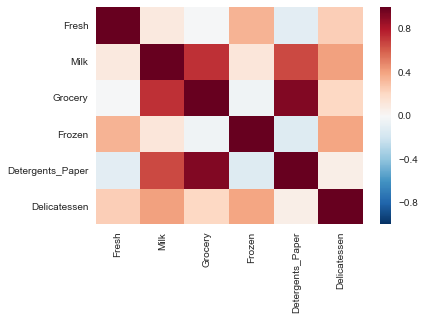

In [56]:
import seaborn as sns
sns.heatmap(data.corr());

In [57]:
# samples.corr()

In [58]:
# places: markets, deli, wholesale retailers, cafes, etc. 

### Question1
  What kind of establishment (customer) could each of three samples you've chosen represent?
  
   **Answer:**  Statistically speaking, comparing these three samples could not help me drive any insight on whole data.
However, there are something need to be noticed based three samples:
- 1.Sample 1 might be a local convenient store;
    - Paper and grocery consumptions are all above the average;
    - Fresh are below the average;
    - Delicatessen consumptions are above the average; Negatively correlated with fresh consumptions.


- 2.Sample 2 might be a food martets;
    - The fresh consumption is much higher than the others and the average;
    - Delicatessen consumption is high;
    - Grocery consumption is high, too.


- 3.Sample 3 might be a cafe;
    - It requires fresh foods;
    - It does not require too much paper. 


- 4.Based on the mean and the standard deviation of the data, the data points might be very spread. 


### 2. Implementation: Feature Relevance
 - One or more of six product categories is relevant;
 - Determine whether customers purchsing some amount of one category of products will necessarily purchase some proportional amount of another category of products;
     - Train a supervised regression on a subset of the data with one feature removed;
     - Score how well that model can predict the removed feature;
 - To be specific:
     - 1.Assign 'new_data' a copy of the data by removing a feature of my choice using 'DataFrame.drop' function;
     - 2.Use 'sklearn.cross_validation.train_test_split';
          - Split the dataset into training and testing sets;
          - Use the removed feature as my target label;
          - Set a 'test_size' of 0.25;
          - Set a 'random_state';
     - 3.Import a decision tree regressor, set a 'random_state', and fit the learner to the training data;
     - 4.Report the prediction score of the testing set using the regressor's score function

In [59]:
'''# 1. Make a copy of the DataFrame, using the 'drop' function to drop the given features
# origi_data = data
new_data = data.drop('Fresh', axis = 1) #inplace = Trure means drop happended in place of the dataframe

# 2.1 Import sklearn.cross_validation.train_test_split
from sklearn.cross_validation import train_test_split

# 2.2 Split the dataset into training and testing sets;
# 2.3 use the removed feature as my target label;
# 2.4 Set 'test_size' = 0.25;
# 2.5 Set 'random_state' = 42;
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Fresh'], test_size =0.25, random_state = 21)


from sklearn import tree
# from sklearn.metrics import accuracy_score

regressor = tree.DecisionTreeRegressor(random_state = 21)
regressor.fit(X_train, y_train)
# pred = regressor.predict(X_test)
# score = accuracy_score(pred, y_test)
score = regressor.score(X_test, y_test)

print score'''''

'''score = -1.4083012562'''
'''Believe it or not, I dont know why.'''
'Just learned, knew why'

'Just learned, knew why'

 - socore is R-squred, for regression problem;
 - accuracy_score is for classification problem;
 - r2_score

In [60]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [61]:
# 1. Make a copy of the DataFrame, using the 'drop' function to drop the given features
new_data = data.drop('Detergents_Paper', axis = 1) #inplace = True means drop happended in place of the dataframe

# 2.1 Import sklearn.cross_validation.train_test_split
from sklearn.cross_validation import train_test_split

# 2.2 Split the dataset into training and testing sets;
# 2.3 use the removed feature as my target label;
# 2.4 Set 'test_size' = 0.25;
# 2.5 Set 'random_state' = 21;
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Detergents_Paper'], test_size =0.25, random_state = 21)


from sklearn import tree

# (from sklearn.metrics import r2_score)
# Create a decision tree regressor and fit it to the training data
regressor = tree.DecisionTreeRegressor(random_state = 21)
regressor.fit(X_train, y_train)
# (pred = regressor.predict(X_test))
# (score = r2_score(pred, y_test))
# Report the score of prediction using the testing set
score = regressor.score(X_test, y_test)

print score

0.647220994118


### Question 2
   - Which feature did you attempt to predict?
   - What was the reported prediction score?
   - Is this feature necessary for identifying customers' spending habits?
   
  
   **Answer:**
   - The feature I tried to predict is "Detergents_Paper".
   - The reported prediction score is about 0.6472
   - Probably not. The r2 score above is not low, which means 'Detergents_Paper' is not hard to predict using the other featuers, so do not consider it as an important feature due to its high relevance. 
   

### 3. Visualize Feature Distributions
   - To get better understanding of the dataset, I need to construct a scatter matrix of each of six product features present in the data.
   - **If you found the feature you attempted to predict is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others.**
   - **Conversely, if you believe that the feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.**

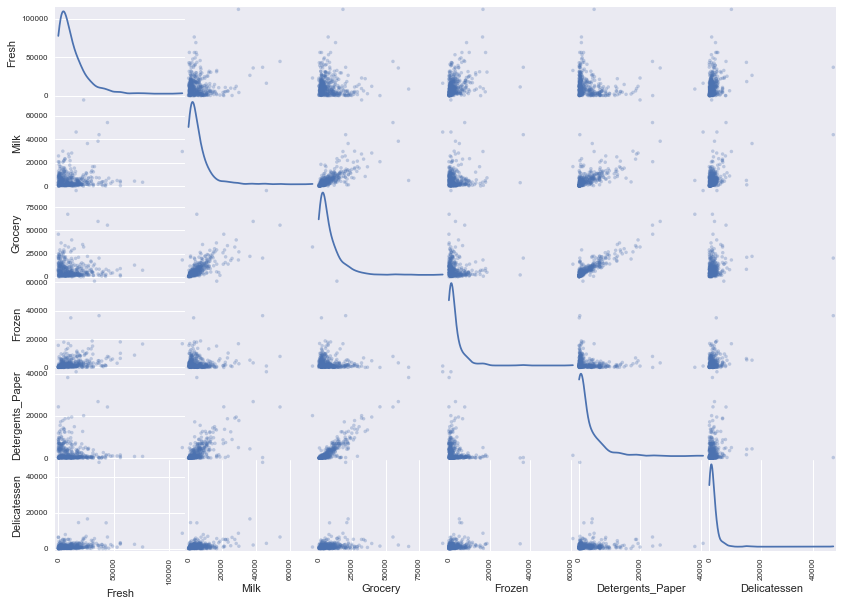

In [62]:
# Produce a scatter matrix for each pair of features in the data
pd.plotting.scatter_matrix(data, alpha = 0.3, figsize = (14,10), diagonal = 'kde');

### Question 3 
   - using the scatter matrix as a reference, discuss the distribution of the dataset (normality, outliers, large number of data points near 0 among others)
   - Are there any pairs of features which exhibit some degree of correlation?
   - Does this confirm or deny your suspicious about the relevance of the feature you attempted to predict?
   - How is the data for those features distributed?
   
**Answer:**
   - Distributions are highly right skewed and not normally distributed. 
        - 'Fresh': {mean:12000.29, median:8504.0}
        - 'Milk': {mean:5796.26, median:3627.0}
        - 'Grocery': {mean:7951.27, median:4755.5}
        - 'Frozen': {mean:3071.93, median:1526.0}
        - 'Detergents-Paper': {mean:2881.49, median:816.5}
        - 'Delicatessen': {mean:1524.87, median:965.5}
   
   There are big differences between means and medians.
   Also, based on the distributions of the scatter points, a few outliers drag the graphs highky skewed. Should fix those points for getting better observations. Using log method probably
   
   
   - Yes, there are some pairs that show some degree of correlation. 
        - 1.Milk & Grocery, Milk & Detergent Papers
        - 2.Grocery & Detergent Paper (this pair has a higher degree of correlation)
   - It confirms my assumption based on its clear correlation.
   - Some of them are approximately distributed linearly. Most of them are scattered around at the left bottom.

----
## Data Preprocessing 
  This section preprocess the data to create a better representation of customers by performing a scaling on the data and detecting and removing outliers. This part makes all the difference.

### 1. Implementation: Feature Scaling
   - If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), apply a non-linear scaling (particularly in financial data)
   - Ways of scaling:
        - [Box-Cox Test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html) : it calculates the best power of transformation of the data that reduce skewness 
        - Natural logarithm : a simpler way

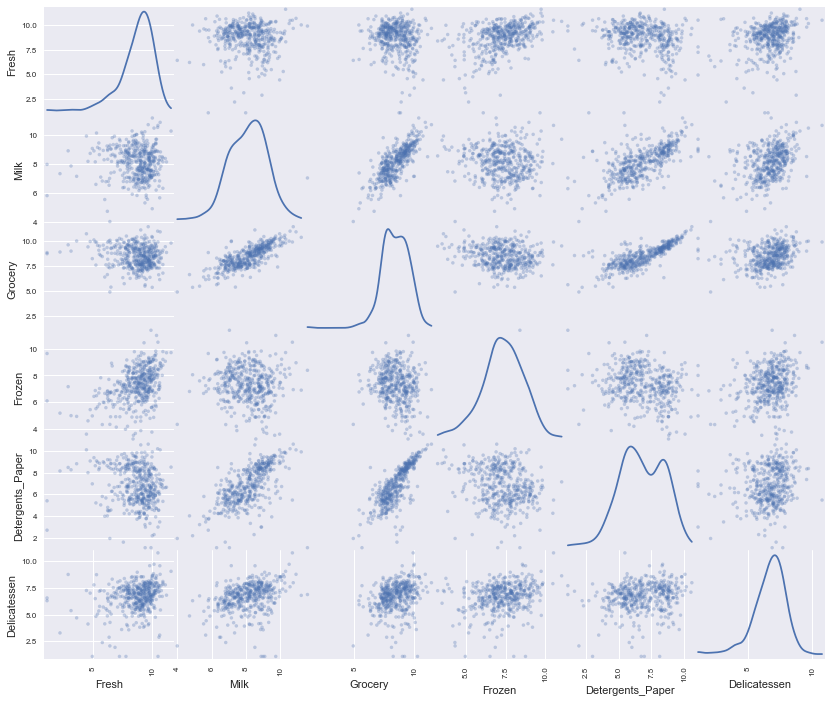

In [63]:
# Scale the data using the natural logarithm
log_data = np.log(data)

# Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, alpha = 0.3, figsize = [14, 12], diagonal = 'kde');
# pd.scatter_matrix(log_data, alpha = 0.3, figsize = [14, 12], diagonal = 'kde') ==> no semicolumn, then there is a array?

### 2. Observation
   After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features I have identified earlier as correlated, observe here whether that correlation is still present and whether it is stronger or weaker than before. 

In [64]:
# Display the log-transformed data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.861775,9.191158,9.166179,7.474205,8.099554,7.482119
1,10.026369,8.596004,8.881558,8.272571,7.482682,8.553525
2,9.483873,7.024649,8.416931,7.258412,6.308098,6.208590


In [65]:
# Display the original samples for comparison
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,22615,5410,7198,3915,1777,5185
2,13146,1124,4523,1420,549,497


### 3. Implementation: Outlier Dection
   - This is extremely important.
   - The presence of outliers can often skew results which take considerations these data points.
   - Rule of thumb: [Turkey's method for identifying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/)
       - An outlier step is calculated 1.5 times the interquartitle range (IQR).
       - A data point with a feature that is beyond outlier step outside of the IQR for that feature is considered abnormal.
       
- Note: make sure samples are not overlap with outliers. 

In [66]:
# For each feature find the points with extreme high or low values
outliers = []
for feature in log_data.keys():
    
    # Calculate Q1 for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # Calculate Q3 for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # Use the IQR to calculate an outlier step
    step = 1.5*(Q3 - Q1)
    
    
    # Display the outliers 
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
                                            # Q1 - step? why not just step?
        
    outliers.extend(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))].index)          
#     print outliers
    

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


In [67]:
sorted(outliers)

[38,
 57,
 65,
 65,
 66,
 66,
 75,
 75,
 81,
 86,
 95,
 96,
 98,
 109,
 128,
 128,
 137,
 142,
 145,
 154,
 154,
 154,
 161,
 171,
 175,
 183,
 184,
 187,
 193,
 203,
 218,
 233,
 264,
 285,
 289,
 304,
 305,
 325,
 338,
 343,
 353,
 355,
 356,
 357,
 412,
 420,
 429,
 439]

In [69]:
# Let's remove outliers
bad_outliers = [65, 66, 75, 128, 154]
good_data = log_data.drop(log_data.index[bad_outliers]).reset_index(drop = True)

In [70]:
len(good_data)

435

### Question 4
 - Are there any data points considered outliers for more than one feature based on the definitin above?
 - Should these data points be removed from the dataset?
 - If any data points were added to the outliers list to be removed, explain why?
 
**Answer:**
 - Yes. For column index = 65, 66, 75, or 128, it appears in two of all features. Index = 154, it appears in three of all features.
 - Not all of them. I am going to drop 65, 66, 75, 128, 154, because they have appeared at least twice and if they are considered as outliers at least out of two of six features, they are highly suspicious. 
 - It depends. t's not a good idea to drop an observation just because it is a outlier. Do investigations and then decide to drop or not:
      1. If a outlier is obviously incorrectly typed or measured, then drop the outlier;
      2. If a outlier does not change results and affect assumptions, then drop the outlier but leave a note in a footnote. (e.g. Neither the absence nor the presence of the outlier in a graph would change the regression line)
      3. If a outlier affects both results and assumptions, then do more analysis both with and without it and leave a note in a footnote.
      4. If a outlier creates a significant association, then drop the outlier and should not report any significance from your analysis. 
     
     (reference: http://www.theanalysisfactor.com/outliers-to-drop-or-not-to-drop/)

 ----
## Feature Transformation
  Apply Principal component Analysis to draw conclusions about the underlying structure of the whosale customer data. 
  (Since using PCA on a dataset calculates the dimension which best maximize variance, we will find compound combinations of features best describe customers.)

### 1. Implementation: PCA
  - The data now has been scaled to a more normal distribution and has had any necessary outliers removed. 
  - We can now apply PCA to the good_data to discover which dimensions about data best maximize the variance of features involved. 
  - In additional to finding these dimensions, PCA will also report the explained variance ratio of each dimension 
       - How much variance within the data is explained by that dimension alone?
  - Note: a component(dimension) from PCA can be considered a new 'feature' of the space, but it is a **composition** of the original features present in the data. 
  - Instructions:
       - 1.Import 'sklearn.decomposition.PCA' and assign the results of fitting PCA in six dimensions with 'good_data' to pca;
       - 2.Apply a PCA transformation of 'log_sample' using pca.transform, and assign the results to 'pca_samples'.


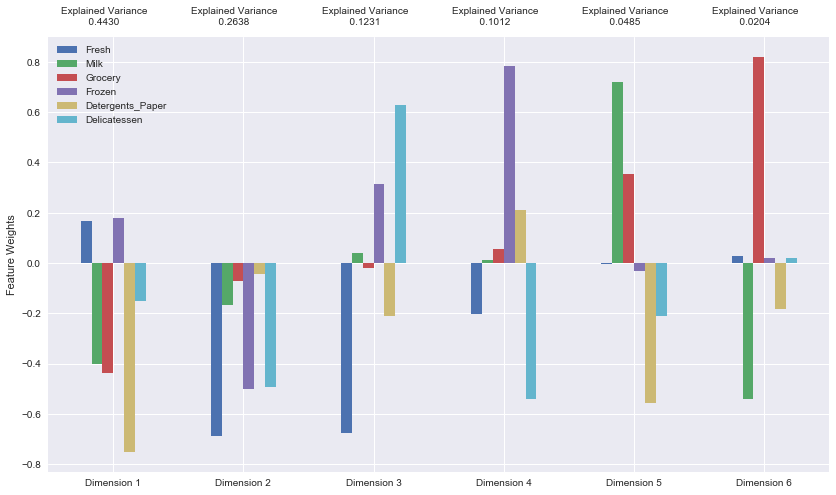

In [71]:
from sklearn.decomposition import PCA

# Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components = 6)
pca.fit(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate the PCA results plot
pca_results = vs.pca_results(good_data, pca)

In [75]:
pca_samples

array([[-1.7886645 , -0.81225054,  0.2314744 , -0.00363127,  0.11938138,
        -0.21064774],
       [-0.78478626, -2.39429434,  0.47976844, -0.3483157 , -0.31909797,
         0.06132544],
       [ 1.01204446, -0.01031466, -0.75160458, -0.05451326, -0.43329983,
         0.66017533]])

### Question 5
 - How much variance in the data is explained in total by the first and second principal component?
 - How much variance in the data is explained by the first four principal components?
 - Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.
 
**Answer:**

 - 0.4993 + 0.2259 = 0.7252, so 0.7252 in the data is explained in total by the first and second principal component.
 - 0.4993 + 0.2259 + 0.1049 + 0.0978 = 0.9279, so 0.p9279 in the data is explained in total by the first four principal compoents.
 - Since PCA deals with the variance of the data and corelations between features, the first componet shows that there are customers who buy a lot of detergent paper, milk and grocery products while other customers buy very few of them, so this component probably represent retail spending in terms of customers spending;
 - The second compoent illustrates that there are customers who purchase a large amount of fresh, frozen, delicateseen while the consumptios of grocery, detergent papers and milk are very low, so this componet may represent cafe or deli spending;
 - The third componet shows that there are customers who purchase a lot of fresh and delicatessen while there are very few consumptions in milk and grocery productions, so this component probabaly is deli or cafe spending;
 - The fourth componet demonstrates that there are customers who buy a large amount of frozn, fresh and delicatessen while very few consumptions in milk, grocery and detergent papers, so this component may be cafe or deli spending.
 
 
 
 
 

### 2. Observation
 How log-transformed sample data has changed after having PCA transformation applied to it in six dimensions. 
 What is the numerical value for the first four dimensions of the sample points? Is it consistent with my initial interpretation of the sample points?

In [76]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.7887,-0.8123,0.2315,-0.0036,0.1194,-0.2106
1,-0.7848,-2.3943,0.4798,-0.3483,-0.3191,0.0613
2,1.0120,-0.0103,-0.7516,-0.0545,-0.4333,0.6602


### 3. Implementation: Dimensionality Reduction
 - One of the main goals of using PCA is to reduce the dimensionality of the data.
 - In other words or in effect, it is reducing complexity of the problem.
 - Cost of reduction: fewer dimensions used implies less of the total variance in the data is being explained. Because of this, **the cumulative explained variance ratio** is extremely important for knowing how many dimensions are necessary for the problem. 
 - Additionaly, if a signifcant amoun t of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.
 - Instructions:
     - 1.Assign the results of fitting PCA in two dimensions with 'good_data' to 'pca';
     - 2.Apply a PCA transformation of 'good_data' using 'pca.transform', and assign the results to 'reduced_data';
     - 3.Apply a PCA transformation of 'log_samples' using 'pca.transform', and assign the results to 'pca_samples';


In [77]:
# Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### 4. Observation
 If only two dimensions, how the log-transformed sample data changed after PCA transformation. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [78]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.7887,-0.8123
1,-0.7848,-2.3943
2,1.0120,-0.0103


---
## Visualizing a Biplot
  - A biplot is a scatterplot where each data point is represented by its scores along the principal components. 
  - The axes are the principal components (in this case  Dimension 1 and Dimension 2).
  - In addition, the biplot shows the projection of the original features along the components.
  - A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

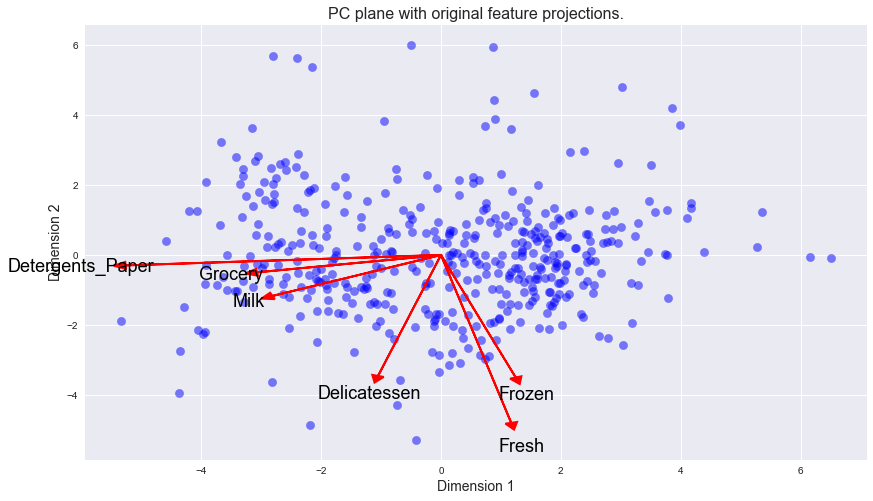

In [79]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### 1. Observation
 Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. 
  - From the biplot, which of the original features are most strongly correlated with the first component?
  - What about those that are associated with the second component? 
  - Do these observations agree with the pca_results plot you obtained earlier?

----
## Clustering
 In this section, use either a K-means clustering algorirhm or a Gaussian Mixture Model clutering algorithm to identify the various customer segments hidden in the data. I will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
 - What are the advantages to using a K-means Clustering Algorithm?
 - What are the advantages to using a Gaussian Mixture Model clustering algorithm?
 - Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?
 
 **Answer:**
 - K-means:
     - The K-means algorithm can be very fast in practice, but likely falls in a local minima.
     - It is fast, robust and easy to understand.
     - It is relatively efficient.
     - Gives the best result when data set are distinct or well separated from each other. 
     - (reference: https://sites.google.com/site/dataclusteringalgorithms/k-means-clustering-algorithm)
 - Gaussian Mixture Model:
     - In terms of speed, it is the fastest algorithm for learning mixture model. 
     - GMM maximizes only the likelihood, so it will not bias the means towards zero, or bias the cluster sizes to have specific structures that might or might not apply. 
     - (reference: http://scikit-learn.org/0.17/modules/mixture.html#gmm-classifier)
 - I choose Gaussian Mixture Model. In this case, I think some data poinst do not exactly belong to a certain clutser. It is not absolute here. However, there is case maybe 70% probability belong to one cluster, but 30% probability belong to another cluster. I think this is a case of soft assignment, so I prefer to use Gauusian Mixture Model here. 

### 1. Implementation: Creating Clusters
 - Depend on the problem, the number of clusters that you expect to be in the data may already be known. 
 - When the number of the clusters is not known a priori, there is no ganrantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data. 
 - However, there is a solution: we can quantity teh 'goodness' of a clustering by calculating each data point's  **silhouette coefficient**.
     - it measures how similar a data point to its assigned cluster from disimilar to similar [-1, 1]. 
     - Calculating the mean silhouette coefficient provides for a simple scoring method of a given clustering.
     
     
 - Instructions:
     - 1.Fit a clustering algorithm to the reduced_data and assign it to clusterer.
     - 2.Predict the cluster for each data point in reduced_data using clusterer.predict and assign them to preds.
     - 3.Find the cluster centers using the algorithm's respective attribute and assign them to centers.
     - 4.Predict the cluster for each sample data point in pca_samples and assign them sample_preds.
     - 5.Import sklearn.metrics.silhouette_score and calculate the silhouette score of reduced_data against preds.
     - 6.Assign the silhouette score to score and print the result.


In [80]:
pca_samples


array([[-1.7886645 , -0.81225054],
       [-0.78478626, -2.39429434],
       [ 1.01204446, -0.01031466]])

In [81]:
from sklearn.mixture import GaussianMixture

# Apply your clustering algorithm of choice to the reduced data
for n in range(2,10):
    clusterer = GaussianMixture(n, random_state = 21).fit(reduced_data)

# Predict the cluster for each data point
    preds = clusterer.predict(reduced_data)
    
# Find the cluster centers
    centers = clusterer.means_

# Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)
    
    from sklearn.metrics import silhouette_score

# Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data, preds)
    
    print n, score
    

2 0.422324682646
3 0.37420184754
4 0.293269564847
5 0.303762583347
6 0.299192883437
7 0.323086770588
8 0.305574080189
9 0.306972754037


In [82]:
clusterer = GaussianMixture(n_components = 2, random_state =21)
clusterer.fit(reduced_data)

# Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# Find the cluster centers
centers = clusterer.means_

# Predict the cluster for each transformed sample data point
samples_preds = clusterer.predict(pca_samples)

### Question 7 
 - Report the silhouette score for several cluster numbers you tried.
 - Of these, which number of clusters has the best silhouette score?
 
 **Answer:**
 - Here are results:
     - 2: 0.447411995571
     - 3: 0.361193625039
     - 4: 0.31271381532
     - 5: 0.313568743105
     - 6: 0.340603716382
     - 7: 0.306055409633
     - 8: 0.280802745616
     - 9: 0.303828027347
 - The highest score occurs when clusters = 2

 ----
## Cluster Visualization
   - Visualize results with the above results;
   - For experimentation purpose, try different numbers of clusters. 


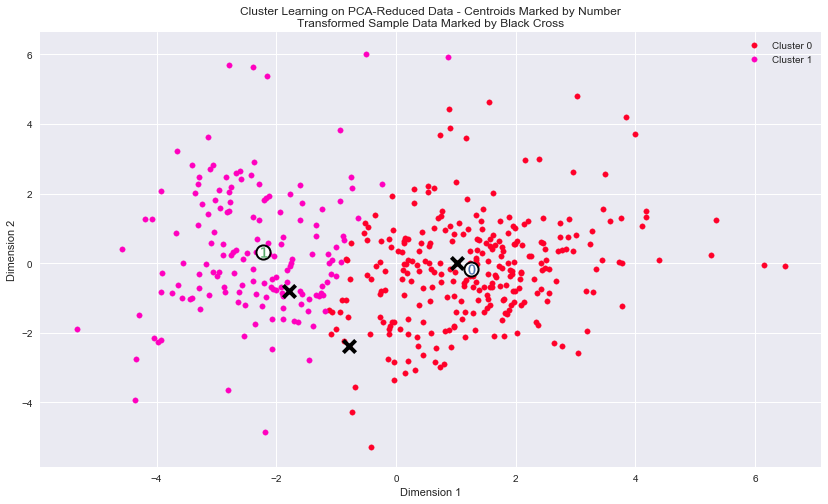

In [83]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### 1. Implementation: Data Discovery
 - Those centers(or means) are not specifically data points from the data, but rather the averages of all data points in the respective clusters. 

In [84]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8939.0,2108.0,2758.0,2073.0,352.0,730.0
Segment 1,3567.0,7860.0,12249.0,873.0,4713.0,966.0


In [95]:
data.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [92]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,7057,9810,9568,1762,3293,1776
1,22615,5410,7198,3915,1777,5185
2,13146,1124,4523,1420,549,497


### Question 8
 - Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?
 
**Answer:**
 - Segment 0 probably is a cafe. It has very low consumptions of paper, between 25% and 50% of the total quantity, and delicatessen which is below 50% out of the total, and grocery which below 50% of the toal, but has a high consumption of fresh which is above 50% out of the total; These consumptions are similiar to daily consumptions in business of a cafe. 
 - Segment 1 probably is a wholesale retailer. Its consumptions of delicatessen, paper, milk and espically grocery are very noticeable. Delicatessen is higher than 50%, detergent paper and milk are even above 75% of total quantity. However, the fresh demand is much lower, which is between 25% and 50% of the total quantity.  

### Question9
 - For each sample point, which customer segment from Question 8 best represents it?
 - Are the predictions for each sample point consistent with this?

In [90]:
# Display the predictions
for i, pred in enumerate(samples_preds):
    print "Sample point", i, "predicted to be in Cluster", pred
    

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


### **Answer:**
 - Sample 0 should be in segment 0, which is most likely the cafe category. 
 - Sample 1 should be in segment 1, which is most likely the wholesale retail category.
 - Sample 2 should be in segment 1, which is most likely the wholesale retail category. 
 - Yes, they are consistant. 
     - For sample 0, the values of grocery, milk and detergent papers are above the average and resemble to the cluster 1 center in those categories. Delicatessen is closed to the average of both sample and predicted cluster, so the predicted cluster seems to be consistent with the category spending of the sample
     - For sample 1, the values of fresh and delicateseen are way above the average and close to the cluster 0 center in those categories. Milk eand groery are closer to the cluster 0 center in those categories, too. So, the predicted cluster seems to be consistent with the category spending of the sample.
     - For sample 2, the values of milk and grocery are around the average and close to cluster 0 center. Also, milk, frozen, detergent papers and delicatessen are close to cluster 0 center. So, the predicted cluster seems to be consistent with the category spending of the sample.
 

----
## Conclusion
 - Investigate ways that I can make use of the clustered data:
     1. Consider how the different groups of customers, **the customer segments**, may be affected differently by a specific delivery scheme;
     2. Consider how giving a label to each customer (which segment that customer belongs to) can provide additional features about the customer data;
     3. Compare the customer segments to a hidden variable present in the data, to see whether the clustering identified certain relationships.
 

### Question 10
 - How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*
 
**Answer:**
 - If the delivery time is shorten, it would probably encourage more fresh consumptions and customer segment0 would probably be more responsive. To find how exactly customer segment0 responds, do A/B tests here. Split custmers in segment0 into two groups, one control group and one testing group. Provide testing group the new service and keep offering the control group the old service, and then check the difference of these two groups to find out whether the segment0 reacts positively.  
 - They can use data to find out what customers purchasing of one category of products will necessarily purchase some proportional amount of another category of products. They can prepare more related invetory in advance to be proactive. 

### Question 11
 - How can the wholesale distributor label the new customers using only their estimated product spending and the customer segment data?

**Answer:**
 - This is a supervised classification problem. Generally speaking, it could be done by importing some supervisied classification algorithms such as decsion tree, random forests, etc. 
 - To be specific, use the estimated product spending as the feature label, and use the customer segment as the target label. Apply the supervised classification algorithm on the new data points to classify them. 
 


### 1. Visualizing Underlying Distributions


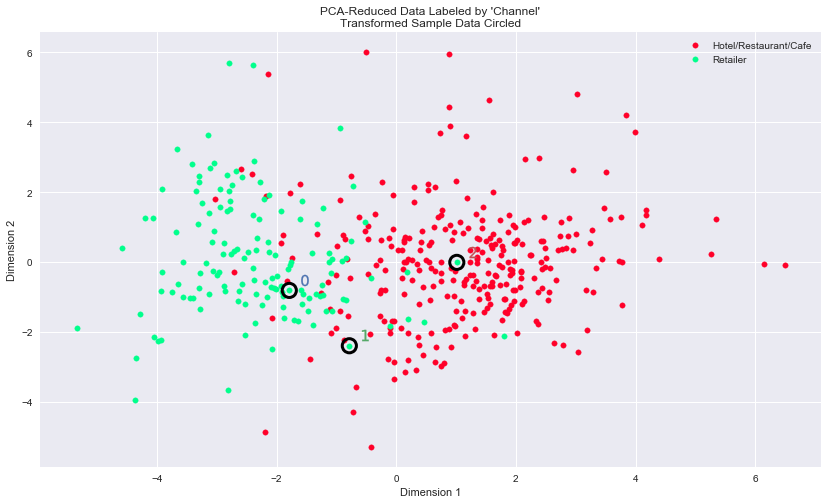

In [96]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, bad_outliers, pca_samples)

### Question 12
 - How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers?
 - Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution?
 - Would you consider these classifications as consistent with your previous definition of the customer segments?
 
**Answer:**
- Not quite well; With an additional feature added in, the clusters cannot group them accurately. There are obvious points clusterd into another group, which caused some overlaps between two clusters. 
- It is not a good idea. Firstly, they are overlapping, so it could not be purely categorized; Secondly, there are probably data points that do not belong into any of these two groups.
- Not qute. Sample 1 switched groups from cafe into wholesale retail. 